Первый проект для курса "Компьютерная лингвистика" <span style= 'color:blue'> Поповичевой Софии </span>

Название проекта <span style= 'color:green'> 'Песни как учебный материал: оценка сложности и частотный анализ лексики'</span>

**Цель проекта**:
Провести частотный анализ текстов песен на английском языке с целью вявления лексических особенностей и конструкций, что может быть полезно для перподавания английского языка и создания учебных материалов.

***Задачи проекта***:
* Собрать корпус песен одного исполнителя с сайта [Amalgama](https://www.amalgama-lab.com)
* Предобработать тексты песен
* Провести лемматизацию текстов
* Выполнить частотный анализ лемм и выявить самые наиболее встречающиеся слова
* Проанализировать биграммы для выявления устойчивых словосочетаний

Для начала соберём небольшой список текстов песен, которые я буду анализировать. Для этого я решила парсить сайт  [Amalgama](https://www.amalgama-lab.com/). В качестве примера, буду анализировать песни [Adele](https://www.amalgama-lab.com/songs/a/adele/) и соответственно парсить тексты со страницы с этой певицей. 

In [2]:
# импорт бибилиотек
import requests # библиотека для работы с HTTP запросами 
from bs4 import BeautifulSoup # для работы с HTML (парсинг HTML)
import pandas as pd # импорт библиотеки для работы с таблицами
import re  # для работы с регулярными выражениями

In [3]:
url = 'https://www.amalgama-lab.com/songs/a/adele/' # адрес страницы с песнями Адель
page = requests.get(url) # загружаю страницу с песнями Адель
soup = BeautifulSoup(page.text) # создаю объект BeautifulSoup для парсинга загруженной страницы

adele_songs = [] # создаю пустой список для хранения плученых текстов песен Adele 

base_url = 'https://www.amalgama-lab.com/songs/a/adele/' # базовый url страницы, в которой находятся все ссылки на песни Адель. К этому url будет добавляться тег на конкретную песню

artist_block = soup.find('li', class_ = 'active') # нахожу блок с песнями Адель, ссылки на которые лежат под тегом li в классе active 
songs_ul = artist_block.find_next_sibling('ul') # нахожу следующий тег ul, который содержит ссылки на песни Адель
for link in songs_ul.find_all('a'): # перебираю все ссылки в полученном блоке с песнями Адель
    href = link.get('href') # получаю значение атрибута href из тега a
    if href and href.endswith('.html'): # проверяю, что ссылка существует и заканчивается на .html
        full_url = base_url + href # формирую полный url для каждой песни, добавляя к базовому url значение href
        adele_songs.append(full_url) # добавляю полный url песни в список adele_songs

print(f' Количество песен: {len(adele_songs)}') # вывожу количество песен Адель, которые были найдены на странице

 Количество песен: 63


Так как на каждой странице с текстом песни содержится ещё и перевод песни на русский язык, то нужно отделить эти два текста и поместить их в разные списки

In [4]:
songs = [] # содаю список для оригинальных текстов песен
translates = [] # создаю список для переводов песен

for i in adele_songs: # прохожу по всем ссылкам песен, которые я собрала выше
    page = requests.get(i) # в цикле я загружаю страницу с песней с каждой ссылки
    soup = BeautifulSoup(page.text) # и для неё создаю суп, чтобы парсить конкретную страницу
    song = [] # для каждой песни создаётся временный список song, в который будут сохранятся все полученные строки 
    translate = [] # и временный список translate, в который будут сохранятся переводы песен
    try: # проверяю, что на странице есть блок с текстом песни и он загружается
        for d in soup.find_all('div', class_="string_container"): # каждая строка песни на странице хранится в классе "string_container". Оригинальный текст хранится в классе "original", а перевод в классе "translate".
            song.append(d.find('div', class_='original').text) # после того, как я нашла блок со оригинальым текстом и переводом, я добавляю текст оригинала в список song
            translate.append(d.find('div', class_='translate').text) # и добавляю перевод в список translate
    except:
        print(f'Ошибка при обработке {i}') # если структура страницы изменилась или что-то пошло не так, я вывожу сообщение об ошибке и ссылку на песню, где это произошло
    songs.append('\n'.join(song)) # соединяю все строки оригинального текста песни в одну строку с разделителем и добавляю в список songs
    translates.append('\n'.join(translate)) # то же самое делаю для перевода песни

In [5]:
print("Пример оригинального текста песни:\n", songs[0][:100], "...\n") # вывожу первые 100 символов оригинального текста первой песни
print("Пример перевода песни:\n", translates[0][:100], "...\n") # вывожу первые 100 символов перевода первой песни

Пример оригинального текста песни:
 [Verse 1:]

I will leave my heart at the door 

I won't say a word 

They've all been said before 

 ...

Пример перевода песни:
 [Куплет 1:]

Я оставлю свое сердце на пороге.

Я не пророню ни слова, 

Они все уже были сказаны.

Т ...



Лемматизация текста

In [6]:
import nltk

nltk.download('punkt')       # скачиваю punkt-токенизатор для удаления пунктуации
nltk.download('wordnet')     # скачиваю WordNet для работы с синонимами и леммами
nltk.download('omw-1.4')     # дополнительная база данных для WordNet
nltk.download('stopwords')   # скачиваю список стоп-слов для удаления "ненжуных" слов

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\popov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\popov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\popov\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\popov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer # импорт леммтизатора 
from nltk.tokenize import word_tokenize # импорт токенизатора
from nltk.corpus import stopwords # импорт стоп-слов
import string 

In [8]:
lemmatizer = WordNetLemmatizer() # создаю объект лемматизатора
stop_w = set(stopwords.words('english')) # создаю множество стоп-слов и записываю в переменную

def lemmatize_song(text): # создаю функцию для лемматизации 
    """
    Лемматизирует текст песни:
    1. Приводит текст к нижнему регистру.
    2. Токенизирует текст на слова.
    3. Удаляет знаки препинания и неалфавитные токены.
    4. Удаляет стоп-слова.
    5. Приводит слова к леммам (начальным формам).
    Возвращает список лемм.
    """
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_w]
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmas

In [9]:
lemmas_first_song = lemmatize_song(songs[0]) # применяю функцию лемматизации к первой песне из списка
print(lemmas_first_song) # вывожу все леммы текста этой песни

['verse', 'leave', 'heart', 'door', 'wo', 'say', 'word', 'said', 'play', 'pretend', 'like', 'scared', 'coming', 'next', 'scared', 'nothing', 'left', 'look', 'get', 'wrong', 'know', 'tomorrow', 'ask', 'chorus', 'last', 'night', 'hold', 'like', 'friend', 'give', 'memory', 'use', 'take', 'hand', 'lover', 'matter', 'end', 'cause', 'never', 'love', 'verse', 'need', 'honesty', 'already', 'eye', 'sure', 'eye', 'speak', 'one', 'know', 'like', 'since', 'one', 'matter', 'tell', 'run', 'look', 'get', 'wrong', 'know', 'tomorrow', 'ask', 'chorus', 'last', 'night', 'hold', 'like', 'friend', 'give', 'memory', 'use', 'take', 'hand', 'lover', 'matter', 'end', 'cause', 'never', 'love', 'bridge', 'let', 'lesson', 'love', 'let', 'way', 'remember', 'u', 'wan', 'na', 'cruel', 'unjust', 'ai', 'asking', 'forgiveness', 'ask', 'chorus', 'last', 'night', 'hold', 'like', 'friend', 'give', 'memory', 'use', 'take', 'hand', 'lover', 'matter', 'end', 'cause', 'never', 'love', 'ask', 'verse', 'leave', 'heart', 'door',

Далее я проведу частотный анализ лемм и также анализ биграмм

In [10]:
from collections import Counter # импортирую счётчик слов
from nltk import bigrams # импортирую список биграмм функцию, которая будет создавать биграммы из лемм

Ниже я провожу частотный анализ лемм, чтобы понять, какие темы певица предпочитает раскрывать в своих песнях

In [11]:
all_lemmas = [] # создаю пустой список, в котором будут храниться все леммы из всех песен

for song in songs: # перебираю все песни
    lemmas = lemmatize_song(song) # применяю к каждой песне уже готовую функцию для лемматизации 
    all_lemmas.extend(lemmas) # добавляю полученные леммы из каждой песни в общий список

lemma_freq =  Counter(all_lemmas) # с помощью счётчика записываю в переменную частоту всстречаемости лемм из всех песен
print(lemma_freq.most_common(30)) # вывожу 30 самых частых лемм из всех песен

[('love', 235), ('never', 154), ('let', 147), ('heart', 140), ('like', 137), ('know', 121), ('go', 117), ('ai', 112), ('time', 97), ('say', 94), ('na', 91), ('want', 89), ('gon', 87), ('fall', 86), ('feel', 81), ('ca', 80), ('one', 75), ('chorus', 73), ('see', 73), ('make', 70), ('could', 64), ('baby', 61), ('deep', 60), ('hello', 57), ('tear', 56), ('tell', 55), ('wo', 54), ('face', 54), ('rolling', 54), ('take', 53)]


Далее я провожу анализ биграмм для выявления наиболее встречающихся пар слов. Это поможет выявить устойчивые фразы и понять стилистику речи. 

In [12]:
all_bigrams = [] # создаю пустой список, в котором будут храниться все биграммы из всех песен

for song in songs:
    lemmas = lemmatize_song(song)
    song_bigrams = list(bigrams(lemmas)) # создаю список пар из подряд идущих слов (лемм)
    all_bigrams.extend(song_bigrams) # добавляю полученные биграммы из каждой песни в общий список

bigram_freq = Counter(all_bigrams) # также отбираю наиболее частые биграммы из всех песен с помощью счётчика
print(bigram_freq.most_common(30)) # вывожу 30 самых частых биграммы из всех песен

[(('gon', 'na'), 87), (('rolling', 'deep'), 53), (('let', 'sky'), 38), (('sky', 'fall'), 36), (('stand', 'tall'), 36), (('tell', 'sorry'), 34), (('never', 'met'), 33), (('na', 'wish'), 31), (('tear', 'gon'), 31), (('fall', 'crumbles'), 31), (('crumbles', 'stand'), 31), (('na', 'fall'), 30), (('tall', 'face'), 30), (('face', 'together'), 30), (('let', 'go'), 28), (('feel', 'like'), 27), (('river', 'lea'), 26), (('love', 'love'), 25), (('want', 'love'), 24), (('know', 'ai'), 24), (('ready', 'ready'), 22), (('wish', 'never'), 21), (('fall', 'rolling'), 21), (('make', 'feel'), 20), (('ai', 'kid'), 20), (('lea', 'river'), 19), (('got', 'ta'), 19), (('never', 'seem'), 18), (('breaking', 'heart'), 18), (('inside', 'hand'), 18)]


Теперь то же самое, но для конкретной песни

In [13]:
def analyze_bigrams_for_song(index):
    """
    Анализирует биграммы для выбранной песни по индексу.

    Аргументы:
        index: Индекс песни в списке songs.

    Возвращает:
        list: Список из 10 наиболее частых биграмм и их частот в формате.
    """
    lemmas = lemmatize_song(songs[index])
    song_bigrams = list(bigrams(lemmas))
    bigram_freq = Counter(song_bigrams)
    return bigram_freq.most_common(10)

print(analyze_bigrams_for_song(5)) # провожу анализ для 6 песни из списка


[(('let', 'go'), 4), (('gave', 'everything'), 3), (('chorus', 'find'), 3), (('find', 'note'), 3), (('note', 'wrote'), 3), (('wrote', 'hid'), 3), (('hid', 'sea'), 3), (('sea', 'mummy'), 3), (('mummy', 'cold'), 3), (('cold', 'hard'), 3)]


Теперь создам облака слов для всех песен и для конкретной песни.

In [14]:
# импортирую библиотеки
from wordcloud import WordCloud # бибилиотека для создания облака слов
import matplotlib.pyplot as plt # библиотека для построения графиков 

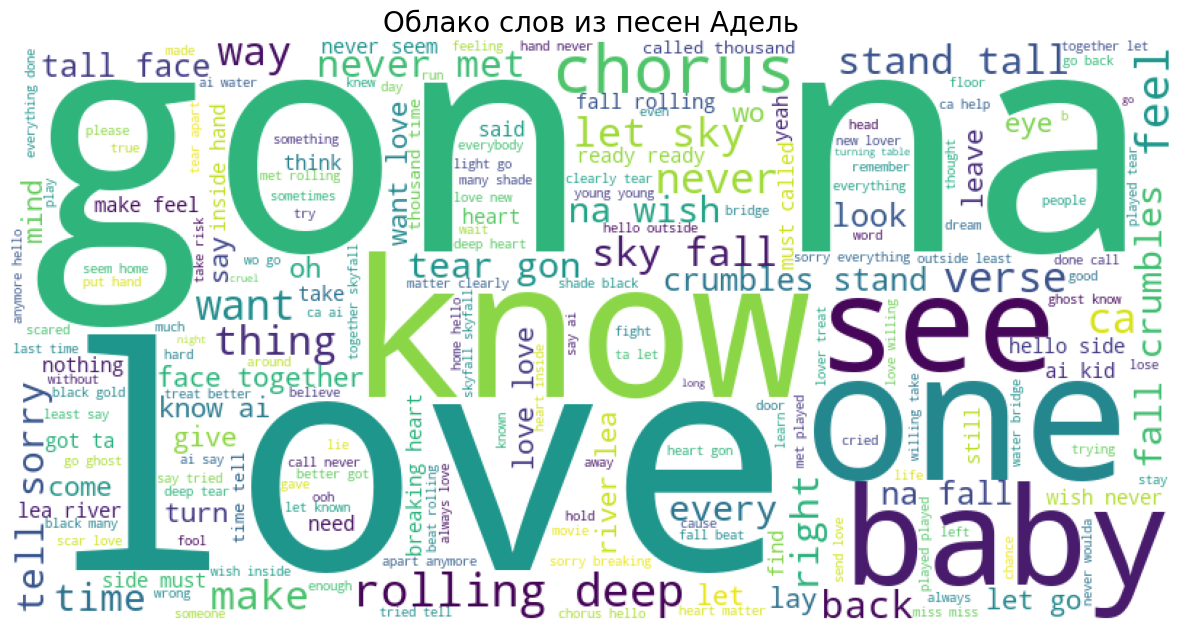

In [15]:
text_for_cloud = ' '.join(all_lemmas) # объединяю все леммы в строку, чтобы потом создать облако (т.к.библиотека WordCloud принимает тлько одну строку, а не список слов)
word_cloud = WordCloud(width=800, height = 400, background_color='white').generate(text_for_cloud) # создаю облако слов из полученной строки

plt.figure(figsize=(15, 8)) # с помощью matplotlib создаю фигуру для отображения облака слов
plt.imshow(word_cloud) # отображаю облако слов 
plt.title('Облако слов из песен Адель', fontsize=20) # добавляю заголовок к графику и задаю размер шрифта
plt.axis('off') # убираю оси координат, чтобы не мешали
plt.show()

Частеречная разметка текстов (POS-теги)

In [ ]:
nltk.download('averaged_perceptron_tagger_eng') # скачиваю теггер для опредления частей речи на английском языке
from nltk import pos_tag # импортирую функцию для определения частей речи (Part of Speech, POS)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\popov\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


In [31]:
lemmas = lemmatize_song(songs[0]) # применяю лемматизацию к первой песне
pos_tags = pos_tag(lemmas) # определяю части речи для каждой леммы с помощью функции pos_tag и записываю в перменную pos_tags
print(pos_tags[:10]) # вывожу первые 10 лемм с их частями речи

[('verse', 'NN'), ('leave', 'VBP'), ('heart', 'NN'), ('door', 'NN'), ('wo', 'MD'), ('say', 'VB'), ('word', 'NN'), ('said', 'VBD'), ('play', 'JJ'), ('pretend', 'VBP')]


Подсчёт долей частей речи

In [25]:
from collections import Counter # импортирую счётчик для подсчёта частей речи

In [ ]:
tags = [] # создаю пустой список для хранения частей речи
for word, tag in pos_tags: # перебираю все леммы и их части речи (распаковываю кортеж из pos_tags)
    tags.append(tag) # добавляю каждую часть речи в список tags
tag_counts = Counter(tags) # считаю частоту встречаемости частей речи и записываю в переменную tag_counts, которая является словарём, где ключ - это часть речи, а значение - количество её вхождений

total = sum(tag_counts.values()) # считаю общее количество частей речи (values это количество всех частей речи)
for tag, count in tag_counts.most_common(10): # вывожу 10 самых частых частей речи и их частоту
    print(f"{tag}: {count} ({count / total:.2%})") # форматирую вывод, где {tag} это чатсь речи, {count} это её количество, а ({count / total:.2%}) считает процент от общего количества частей речи и выводит его в формате процента с двумя знаками после запятой

NN: 92 (41.26%)
JJ: 41 (18.39%)
VBP: 27 (12.11%)
VB: 19 (8.52%)
RB: 14 (6.28%)
IN: 12 (5.38%)
VBD: 4 (1.79%)
VBG: 4 (1.79%)
CD: 4 (1.79%)
MD: 2 (0.90%)


Расшифрока некоторых тегов: 
| Тег | Значение        |
| --- | --------------- |
| NN  | существительное |
| JJ  | прилагательное  |
| VB  | глагол          |
| RB  | наречие         |
| PRP | местоимение     |


Визуализация частей речи для конкретной песни (гистограмма)

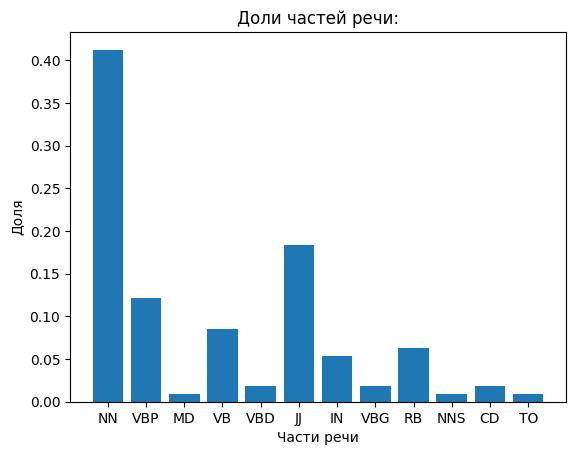

In [30]:
# подготавливаю данные для визуализации
tags = list(tag_counts.keys()) # создаю список всех частей речи, нарпимер ['NN', 'VB', 'JB']
counts = list(tag_counts.values()) # создаю список их количеств, например [100, 50, 30]
total = sum(counts) # считаю общее количество частей речи
proportions = [] # создаю пустой список для хранения пропорций частей речи
for count in counts: # перебираю каждое значение из списка counts
    proportion = count/total # считаю пропорцию каждой части речи
    proportions.append(proportion) # добавляю пропорцию в списко proportions 

plt.bar(tags, proportions) # строю столбчатую диаграмму, где по оси x части речи, а по оси y их пропорции
plt.title("Доли частей речи:") # добавляю заголовок к графику
plt.xlabel('Части речи') # добавляю подпись к оси x
plt.ylabel("Доля") # добавляю подпись к оси y

plt.show() # отображаю график
